In [53]:
1+1

2

In [49]:
ls /mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result

20220511_so3_exp_0/                            20220823_sine_dat_0/
20220611_so3/                                  20220824_MstarRemoveXa_0/
20220611_so3_so3run/                           20220825_Mstar_variation_0/
20220611_so3_so3run_rcst/                      20220826_Mstar_orth_0/
20220611_so3_so3run_rcst_iter/                 20220827_Mstar_orth_mlp_0/
20220615_Mstar_comm/                           20220829_Mstar_inv_reg_0/
20220615_NeuralMstar/                          20220829_Mstar_inv_reg_cnn_0/
20220615_NeuralMstar_neuralM/                  20220830_Mstar_orth_mlp_0/
20220615_NeuralMstar_neuralM_vanilla/          20220831_Mstar_orth_0/
20220615_default_run_mnist/                    20220901_Mstar_inv_reg_cnn_0/
20220617_NeuralMstar_bg_neuralM_comm/          20220901_Mstar_orth_0/
20220617_NeuralMstar_bg_neuralM_vanilla/       20220907_latentPredict_0/
20220617_default_run_mnist_bg/                 20220908_latentPredict_bg_0/
20220621_NeuralMstar_bg_neuralM_comm/          202

In [50]:
import os
import sys
sys.path.append('../')
sys.path.append('../datasets')
sys.path.append('../models')
import torch
import torchvision
import torch.backends.cudnn as cudnn
import random
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from importlib import reload
from datasets.three_dim_shapes import ThreeDimShapesDataset
from datasets.small_norb import SmallNORBDataset
from datasets.seq_mnist import SequentialMNIST
from datasets.seq_mnist import SequentialMNIST_double
from datasets import seq_mnist as sm

import models.seqae as seqae
import models.base_networks as bn 
from models import misc_mnet as mnet

import models
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from einops import rearrange
from sklearn.metrics import r2_score
import pdb
from einops import rearrange
from utils import notebook_utils as nb
from utils import evaluations as ev



import copy

import csv
import ast
from source import yaml_utils as yu


from tqdm import tqdm

if torch.cuda.is_available():
    device = torch.device('cuda')
    cudnn.deterministic = True
    cudnn.benchmark = True
else:
    device = torch.device('cpu')
    gpu_index = -1

    
from utils import yaml_utils as yu
import yaml
rootpath = '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/'
result_dir = '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result'
jobdir = '/mnt/vol21/masomatics/ULASclone/jobs'

mode = 'so3'
dat_root = f"""/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/datasets/{mode}"""

playground_path = os.path.join(result_dir, '20220913_playground_model')


print(os.path.exists(playground_path))

print(nb.filter_list('double', os.listdir(result_dir)))
#1116
#targpath = os.path.join(result_dir, '20221116_mnist_double_0')

#1117
targpath = os.path.join(result_dir, '20221223_glasso_0')



print(os.path.exists(targpath))
print(os.listdir(targpath))

True
['20221031_double_mnist_two_0', '20221117_mnist_double_0', '20221117_mnist_double_two_0', '20221104_mnist_double_0', '20221103_mnist_double_0', '20221122_double_translation_0', '20221124_double_translate_0', '20221116_mnist_double_0', '20221101_mnist_double_0', '20221031_double_mnist_0', '20221101_mnist_double_two_0']
True
['detach1_modeglasso', 'detach0_modeglasso', 'detach1_modeexact', 'detach0_modeexact']


In [51]:
reload(nb)
alltarglist = os.listdir(targpath)

alltarglist = nb.model_exists(alltarglist,  targpath)

#1116, 1117
targlist = nb.filter_queries(query_list=[''] , mylist=alltarglist)

#targlist = nb.filter_queries(query_list=['SequentialMNIST_detach'] , mylist=alltarglist)



#1117
#targlist = nb.filter_queries(query_list=['pair_transitionTrue'] , mylist=alltarglist)

print(targlist)





['detach1_modeglasso', 'detach0_modeglasso', 'detach1_modeexact', 'detach0_modeexact']


In [ ]:
print(targdir_pathlist)

In [52]:
reload(ev)
reload(sm)
results = {} 
inferred_Ms = {} 
model_configs = {}
models = {}
tp = 30
n_cond = 2
device =0
predictive = False
reconstructive = False
repeats=3
alteration={}
#alteration={'model.args.inner_args.num_loops':'40'} 

targdir_pathlist = [os.path.join(targpath, targdir) for targdir in targlist] 
targdir_pathlist  = nb.filter_queries(query_list=['detach0'] , mylist=targdir_pathlist )


#targdir_pathlist = ['/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result/20221116_mnist_double_0/pair_transitionFalse_dim_m256_dim_a8']
#targdir_pathlist = []
#targdir_pathlist.append(playground_path)

print(targdir_pathlist)

reload(ev)
reload(bn)
allresults, targ, xnext = ev.prediction_evaluation(targdir_pathlist, device=0,
                                                                        n_cond=2,
                                                                        tp=tp,
                                                                    repeats=1,
                           predictive= False , reconstructive = False, alteration = alteration)

results = allresults['results']






['/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result/20221223_glasso_0/detach0_modeglasso', '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result/20221223_glasso_0/detach0_modeexact']
{'args': {'T': 32, 'backgrnd': False, 'fixpos': True, 'max_T': 32, 'max_angle_velocity_ratio': [-0.5, 0.5], 'max_color_velocity_ratio': [-0.5, 0.5], 'only_use_digit4': True, 'pair_transition': False, 'root': '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/datasets/MNIST', 'same_object': False, 'train': True}, 'fn': './datasets/seq_mnist.py', 'name': 'SequentialMNIST_double'}
/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result/20221223_glasso_0/detach0_modeglasso 
 snapshot_model_iter_100000


100%|██████████| 183/183 [00:41<00:00,  4.38it/s]


tensor([ 0.0000, 43.5366, 50.5156, 42.7205, 37.9338, 41.4737, 36.4901, 40.4389,
        41.5496, 47.2019, 41.6954, 47.3986, 44.7463, 46.4192, 46.2450, 48.0166,
        43.7378, 48.8785, 42.9993, 44.4433, 45.3995, 47.0300, 44.6194, 48.0478,
        47.5693, 44.0712, 44.1789, 50.6061, 63.1796,     nan,     nan,     nan])
{'args': {'T': 32, 'backgrnd': False, 'fixpos': True, 'max_T': 32, 'max_angle_velocity_ratio': [-0.5, 0.5], 'max_color_velocity_ratio': [-0.5, 0.5], 'only_use_digit4': True, 'pair_transition': False, 'root': '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/datasets/MNIST', 'same_object': False, 'train': True}, 'fn': './datasets/seq_mnist.py', 'name': 'SequentialMNIST_double'}
/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result/20221223_glasso_0/detach0_modeexact 
 snapshot_model_iter_100000


100%|██████████| 183/183 [00:42<00:00,  4.28it/s]


tensor([ 0.0000,  1.0598,  2.0651,  5.3966,  8.4825,  9.8844, 10.7233, 12.5055,
        14.3655, 15.3365, 15.8388, 16.8367, 17.7553, 18.4615, 18.7321, 19.2472,
        20.0025, 20.4902, 20.8419, 21.1096, 21.7184, 22.1639, 22.4167, 22.8207,
        23.2313, 23.6765, 23.9163, 24.1921, 24.6005, 24.7708, 25.1724, 25.5630])


In [22]:
len(allresults['results'].keys())

4

In [24]:
visualize_list = nb.filter_queries(query_list=['detach0'] , mylist=allresults['models'].keys())
visualize_list

['/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result/20221223_glasso_0/detach0_modeglasso',
 '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result/20221223_glasso_0/detach0_modeexact']

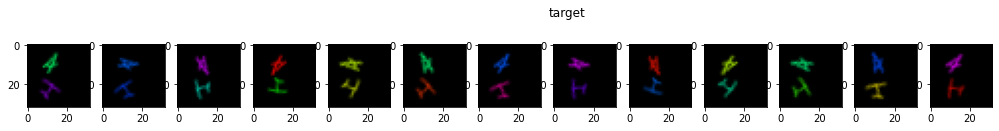

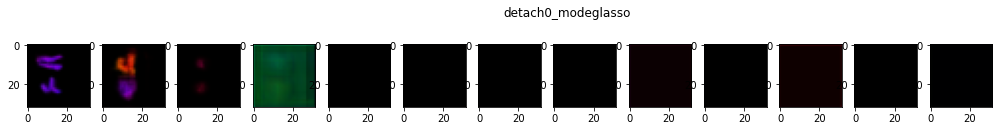

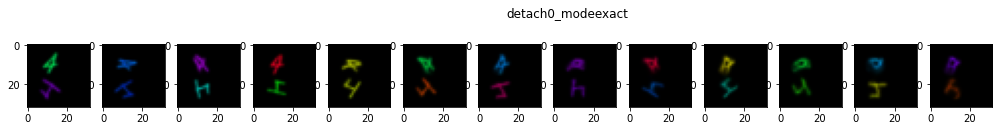

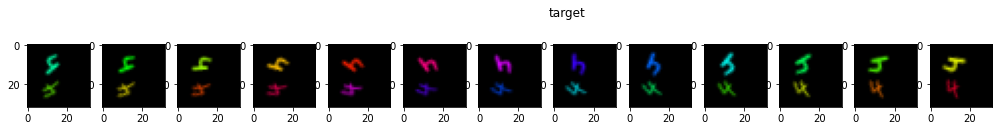

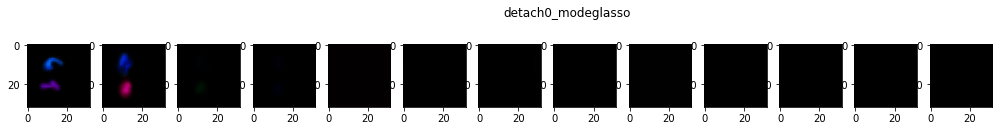

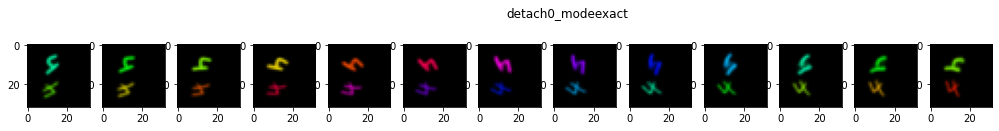

In [26]:



tp =15
device = 0
reload(sm)
for idx in list(range(0, 2)):
    figsize = (20,2)


    plt.figure(figsize = figsize)
    for k in range(tp-n_cond):
        tn = torch.permute(targ[idx][k+n_cond], (1,2,0))
        plt.subplot(1, tp, k+1)
        plt.imshow(tn, interpolation=None)
    plt.suptitle("target")  

    for mode in list(visualize_list):
        plt.figure(figsize = figsize)
        xnext, M = ev.predict(targ, allresults['models'][mode].to(device),
                    n_cond=2, tp=tp, device=device, swap =False,
                    predictive=False, reconstructive=False)
        xnext = xnext.to('cpu')
        M = M.to('cpu')
        for k in range(tp-n_cond):
            xn = torch.permute(xnext[idx][k], (1,2,0))
            plt.subplot(1, tp, k+1)
            plt.imshow(xn, interpolation=None)
        plt.suptitle(mode.split('/')[-1])    




# Obtain Ms

In [6]:
from utils import optimize_bd_cob as obc 
reload(obc)
Ms = allresults['Ms'][mode]
normalize=False
ChangeB= obc.optimize_bd_cob(Ms,  lr=0.1, epochs_monitor=20, n_epochs=300, normalize=True) 

ep:19 loss:2.0208674585602946
ep:39 loss:2.0177822939054235
ep:59 loss:2.0157062697190202
ep:79 loss:2.014642233964475
ep:99 loss:2.013478956496785
ep:119 loss:2.0136307137178173
ep:139 loss:2.0127914686065878
ep:159 loss:2.0130215208647146
ep:179 loss:2.012118277872968
ep:199 loss:2.011752262135068
ep:219 loss:2.0115469169714646
ep:239 loss:2.01171631422895
ep:259 loss:2.011165003015831
ep:279 loss:2.010848111544762
ep:299 loss:2.0112809663111118


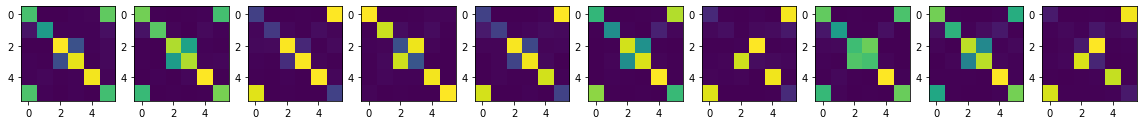

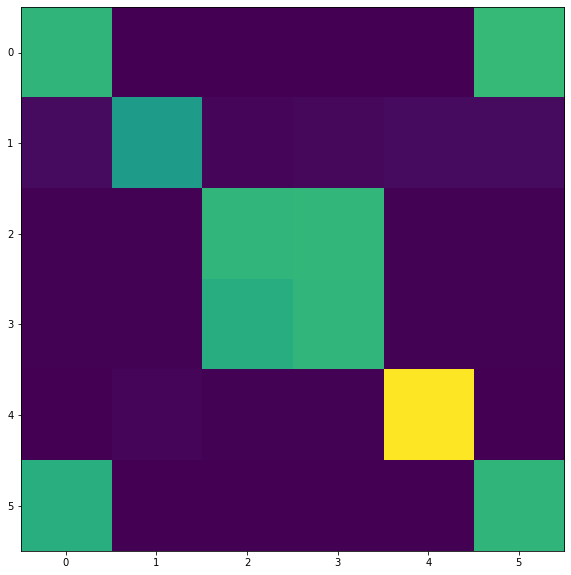

In [7]:
PMPs = ChangeB(Ms)
plt.figure(figsize=(20, 20))
for k in range(10):
    plt.subplot(1, 10, k+1)
    plt.imshow(torch.abs(PMPs[k]).detach().to('cpu'))
    
plt.figure(figsize=(10, 10))
plt.imshow(torch.mean(torch.abs(PMPs.detach()), axis=0))



In [8]:
reload(obc)
selections = obc.obtain_blocks(torch.mean(torch.abs(PMPs.detach()), axis=0), threshconst=0.5)
print(selections)

4 2 2
3 1 3
1 2 5
0 1 6
[[0, 5], [1], [2, 3], [4]]


# Obtain pair of sequences moving only one obj

/tmp/ipykernel_39/854296194.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plt.imshow(torch.tensor(datseq1[k]).permute([1, 2, 0]))
/tmp/ipykernel_39/854296194.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plt.imshow(torch.tensor(datseq2[k]).permute([1, 2, 0]))


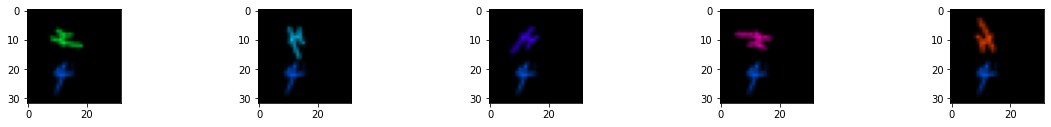

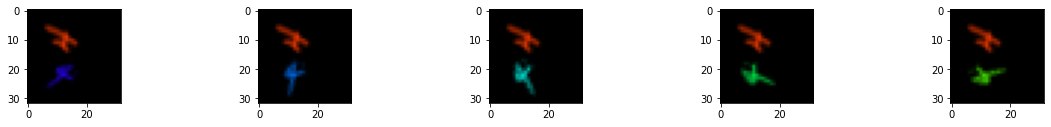

In [9]:
from utils import optimize_lasso as ol 
import einops
reload(ol)
datseqs1, datseqs2 = ol.obtain_pair_sequences(mode, size=30, T=5)



idd = 2
datseq1= datseqs1[idd]
datseq2= datseqs2[idd]


plt.figure(figsize=(20,10))
for k in range(len(datseq1)):
    plt.subplot(5, len(datseq1),  k+1)
    plt.imshow(torch.tensor(datseq1[k]).permute([1, 2, 0])) 

plt.figure(figsize=(20,10))
for k in range(len(datseq2)):
    plt.subplot(5, len(datseq2),  k+1)
    plt.imshow(torch.tensor(datseq2[k]).permute([1, 2, 0])) 

# Encode the sequences by Model 

In [10]:
checkmodel = allresults['models'][mode].to('cpu')



In [11]:
encoded = checkmodel.encode(datseqs1).detach()
encoded_two = checkmodel.encode(datseqs2).detach()
print(datseqs1.shape)
print(datseqs2.shape)

print(encoded.shape)
print(encoded_two.shape)

encodedP = (encoded.to('cpu') @ ChangeB.U).detach()

encoded_twoP = (encoded_two.to('cpu') @ ChangeB.U).detach()



torch.Size([30, 5, 3, 32, 32])
torch.Size([30, 5, 3, 32, 32])
torch.Size([30, 5, 128, 6])
torch.Size([30, 5, 128, 6])


# Get deltas and stack vertically 

/tmp/ipykernel_39/4080009953.py:14: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2, np.ceil(len(selections)/2), k)


torch.Size([240, 128])
torch.Size([120, 128])
torch.Size([240, 128])
torch.Size([120, 128])


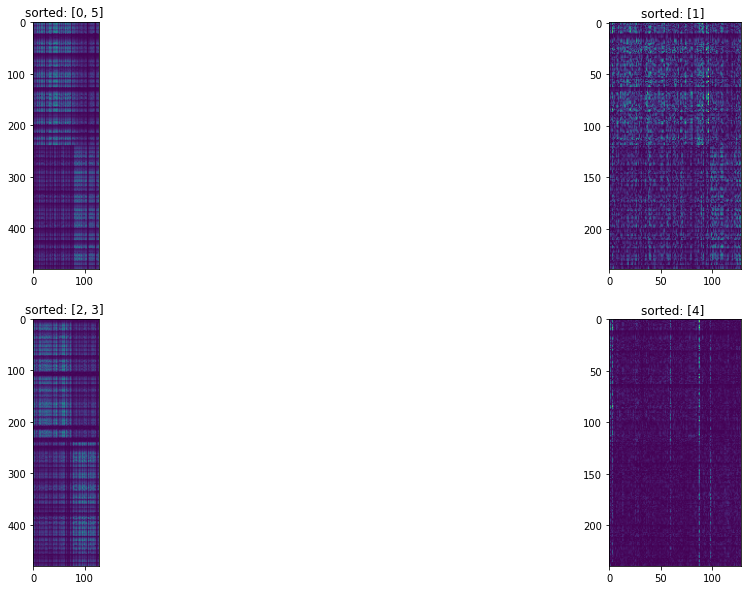

In [12]:

# k=1
# selection = selections[k]

chosen_selections = [] 
partitions = []
onewins = []
twowins = [] 

plt.figure(figsize=(20,10))
k=0
for selection in selections:

    k = k+1
    plt.subplot(2, np.ceil(len(selections)/2), k)
    
    delta_one_list = []
    delta_two_list = [] 
    for b in range(len(encodedP)):


        encodedU = encodedP[b, :, :, selection]
        encoded_twoU = encoded_twoP[b, :, :, selection]
        deltaU = encodedU[1:] - encodedU[0]
        deltaU = einops.rearrange(deltaU, 't s a -> (t a) s')
        delta_twoU = encoded_twoU[1:] - encoded_twoU[0]
        delta_twoU = einops.rearrange(delta_twoU, 't s a -> (t a) s')

        delta_one_list.append(deltaU)
        delta_two_list.append(delta_twoU)

    #Shall be [b x (T-1) x (dimI)]  x dimS
    delta_one = torch.cat(delta_one_list)
    delta_two = torch.cat(delta_two_list)
    print(delta_one.shape)


    
    #sort
    delta_sort, delta_two_sort, (onewin, twowin) = ol.sort_pair_col(delta_one, delta_two)
    plt.imshow(torch.cat([torch.abs(delta_sort.detach().to('cpu')),  torch.abs(delta_two_sort.detach().to('cpu'))]  ))
    plt.title(f"""sorted: {selection} """)
    #Record
    chosen_selections.append(selection)
    partitions.append([onewin] + [twowin] )
    onewins.append(onewin)
    twowins.append(twowin)


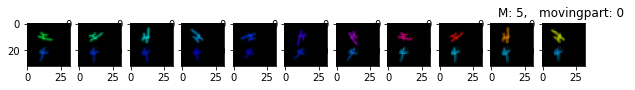

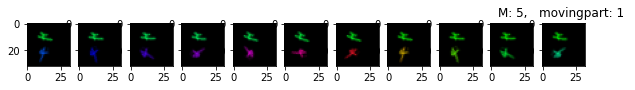

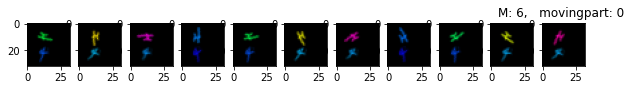

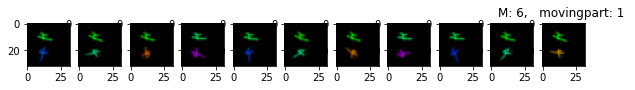

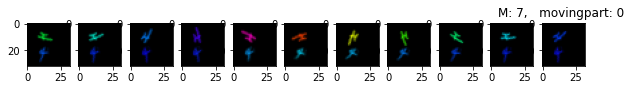

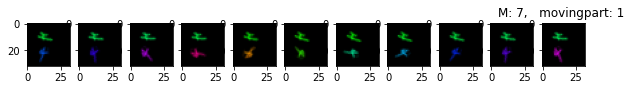

In [13]:
#check = 2
#len(partitions[check][0]), len(partitions[check][1])
reload(ol)
H = encodedP[2][0]
T = 10
dim1treatment=False

for k in range(5, 8):
    M = PMPs[k]

    for part_idx in [0, 1]:
    #part_idx = 0

        Hs_movedP = ol.move_partial(chosen_selections, H, M, partitions, part_idx, T=T, dim1treatment=dim1treatment)
        Hs_moved = Hs_movedP @ torch.linalg.inv(ChangeB.U).detach()
        decoded0 = checkmodel.decode(Hs_moved.unsqueeze(0))[0].permute([0,2,3,1]).detach()
        plt.figure(figsize=(10,10))
        for t in range(len(Hs_moved)):
            plt.subplot(1, len(Hs_moved), t+1)
            plt.imshow(torch.sigmoid(decoded0[t]))
        plt.title(f"""M: {k},   movingpart: {part_idx} """)

#     part_idx = 1
#     Hs_movedP = ol.move_partial(chosen_selections, H, M, partitions, part_idx, T=T, dim1treatment=dim1treatment)
#     Hs_moved = Hs_movedP @ torch.linalg.inv(ChangeB.U).detach()
#     decoded0 = checkmodel.decode(Hs_moved.unsqueeze(0))[0].permute([0,2,3,1]).detach()
#     plt.figure(figsize=(10,10))
#     for t in range(len(Hs_moved)):
#         plt.subplot(1, len(Hs_moved), t+1)
#         plt.imshow(torch.sigmoid(decoded0[t]))
#     plt.title(f"""M: {k},   movingpart: {part_idx} """)

In [14]:
encodedP.shape

torch.Size([30, 5, 128, 6])

# Covmat training : I need H[0] for at least "m" number of sequences

In [15]:
# Obtain images with randomly moving objects 

config = allresults['configs'][mode]
dataconfig = config['train_data']
dataconfig['args']['T'] = 1
dataconfig['args']['pair_transition'] = False




inter_data = yu.load_component(dataconfig)

train_loader = DataLoader(inter_data, batch_size=config['batchsize'],
                          shuffle=True, 
                          num_workers=1,
                          )



/tmp/ipykernel_39/1596422946.py:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(4, np.ceil(len(trial)/4), k+1)


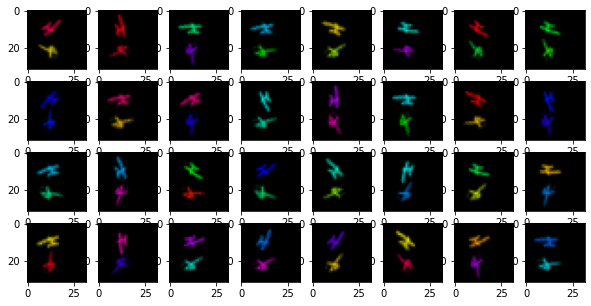

In [16]:
trial = next(iter(train_loader))[0]

plt.figure(figsize=(10,5))
for k in range(len(trial)):
    plt.subplot(4, np.ceil(len(trial)/4), k+1)
    plt.imshow(trial[k].permute([1,2,0]))

In [17]:
from einops import rearrange
# get encodedP across the sequence
list_encodedAP = [] 
device = 0 
for images in tqdm(train_loader):
    if type(images) == list:
        images = torch.stack(images)
        images = images.transpose(1, 0).to(device)
    checkmodel=checkmodel.to(device)
    encodedA = checkmodel.encode(images).to('cpu').detach()
    encodedAP = (encodedA @ ChangeB.U).detach()
    
    list_encodedAP.append(encodedAP)

    #encodedAPcat = torch.cat(list_encodedAP, axis=0).squeeze(1)
encodedAPcat = torch.cat(list_encodedAP, axis=0)
checkmodel=checkmodel.to('cpu')

100%|██████████| 183/183 [00:12<00:00, 14.20it/s]


In [18]:
print(selections)

[[0, 5], [1], [2, 3], [4]]


In [36]:
f = 0
selection = selections[f]
print(selection)

encodedAPfreq = encodedAPcat[: ,:,  :, selection]
encodedAPfreq = rearrange(encodedAPfreq, 'b t s f -> b s (t f)')

print(encodedAPfreq.shape)
covmat_freq = ol.covariance(encodedAPfreq)

[0, 5]
torch.Size([5842, 128, 2])


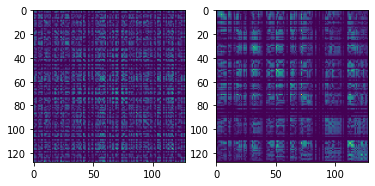

In [37]:
abscov_freq = torch.abs(covmat_freq)
plt.subplot(1, 2, 1)
plt.imshow(abscov_freq)

abscov_freq_sorted, _ = obc.blockify(abscov_freq)
plt.subplot(1, 2, 2)
plt.imshow(abscov_freq_sorted)






In [38]:
#encodedAPfreq.shape

encodedAPfreq.shape

torch.Size([5842, 128, 2])

Text(0.5, 1.0, 'sorted by reverse mckee')

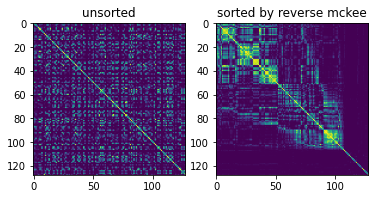

In [96]:
#try normalizing the encodedAPfreq by columns

exponent = 3

encodedAPfreqN = encodedAPfreq/ torch.sqrt(torch.sum(encodedAPfreq**2 , axis = -1, keepdims=True))



covmat_freq = ol.covariance(encodedAPfreqN)

abscov_freq = torch.abs(covmat_freq)**exponent
plt.subplot(1, 2, 1)
plt.imshow(abscov_freq)
plt.title("unsorted")

abscov_freq_sorted, _ = obc.blockify(abscov_freq, hard=True)
plt.subplot(1, 2, 2)
plt.imshow(abscov_freq_sorted)
plt.title("sorted by reverse mckee")





In [40]:
# Norm shall be decided by the canonical g0H
canonical = 1
norm_encodedAPfreq = torch.sqrt(torch.sum(encodedAPfreq[0]**2 , axis = -1, keepdims=True)).unsqueeze(0)
print(encodedAPfreq.shape, norm_encodedAPfreq.shape)

encodedAPfreqN = encodedAPfreq/ norm_encodedAPfreq


torch.Size([5842, 128, 2]) torch.Size([1, 128, 1])


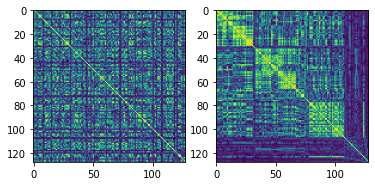

In [41]:
reload(ol)
cormat_freq = ol.correlation(encodedAPfreqN)

abscor_freq = torch.abs(cormat_freq)
plt.subplot(1, 2, 1)
plt.imshow(abscor_freq)

abscor_freq_sorted, _ = obc.blockify(abscor_freq, hard=True)
plt.subplot(1, 2, 2)
plt.imshow(abscor_freq_sorted)

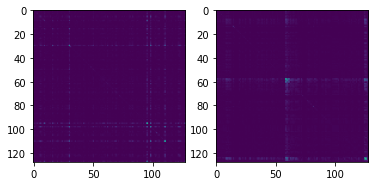

In [42]:
covmat_freq = ol.covariance(encodedAPfreqN)

abscov_freq = torch.abs(covmat_freq)
plt.subplot(1, 2, 1)
plt.imshow(abscov_freq)

abscov_freq_sorted, _ = obc.blockify(abscov_freq, hard=True)
plt.subplot(1, 2, 2)
plt.imshow(abscov_freq_sorted)



# Checking if the dataset contains unwanted correlation

100%|██████████| 183/183 [00:03<00:00, 59.57it/s]


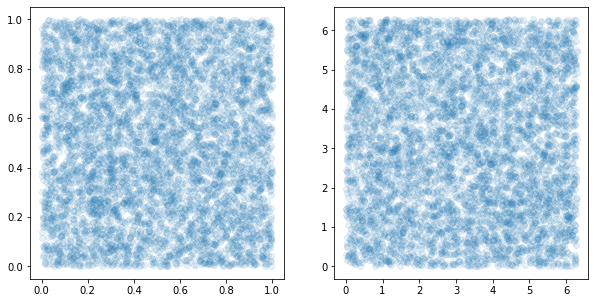

In [43]:
reload(sm)

debug_data = sm.SequentialMNIST_double(param_debug=True, **dataconfig['args'])


debug_loader = DataLoader(debug_data, batch_size=config['batchsize'],
                          shuffle=True, 
                          num_workers=1, 
                          )

paramsXcol = []
paramsYcol = []
paramsXang = []
paramsYang = []

plt.figure(figsize=(10,5))
for params in tqdm(debug_loader):
    
    paramsX , paramsY = params
    paramsXcol.append(paramsX['color_0'])
    paramsYcol.append(paramsY['color_0'])
    paramsXang.append(paramsX['angles_0'])
    paramsYang.append(paramsY['angles_0'])
    
paramsXcol = torch.cat(paramsXcol)
paramsYcol = torch.cat(paramsYcol)

paramsXang = torch.cat(paramsXang)
paramsYang = torch.cat(paramsYang)

plt.subplot(1,2,1)
plt.scatter(paramsXcol, paramsYcol, alpha=0.1)
plt.subplot(1,2,2)
plt.scatter(paramsXang, paramsYang, alpha=0.1)




In [44]:
print(torch.mean(paramsXcol * paramsYcol)  - torch.mean(paramsXcol) * torch.mean(paramsYcol))
print(torch.mean(paramsXang * paramsYang)  - torch.mean(paramsXang) * torch.mean(paramsYang))

tensor(-0.0006, dtype=torch.float64)
tensor(-0.0720, dtype=torch.float64)


# Debug of the whole scheme:  From a fixed H and the set of Ms, apply differnet Ms to a parition and see if the current covariance code can really reveal the split.

In [164]:
print(encodedAPfreq.shape)
synthetic_partition = [list(range(0,64)), list(range(64,128))]
baseAPfreq = torch.mean(encodedAPfreq, axis=0).detach()
print(baseAPfreq.shape)

torch.Size([5842, 128, 2])
torch.Size([128, 2])


In [170]:
synthetic_dat = []
numG = len(Ms)
numG=10
for k in range(numG):
    placeholder = torch.zeros(baseAPfreq.shape)
    k0, k1 = np.random.choice(numG, size=2)
    Ms_freq0 = PMPs[k0][selections[f]][:, selections[f]] 
    Ms_freq1 = PMPs[k1][selections[f]][:, selections[f]] 

    #noisemix = torch.tensor(np.random.normal(0, 0.1, size=[64, 64])).float()
    noisemix = torch.eye(64)
    noise = noisemix @ torch.tensor(np.random.normal(0, 0.05, size=[64, 2])).float()
    placeholder[:64] = baseAPfreq[:64] @ Ms_freq0  + noise
    placeholder[64:] = baseAPfreq[64:] @ Ms_freq1  + noise
    
    synthetic_dat.append(placeholder)
synthetic_dat = torch.stack(synthetic_dat).detach()


In [171]:
selections[f]

[0, 5]

In [172]:
reload(ol)
validate_cor = ol.correlation(synthetic_dat)
validate_cov = ol.covariance(synthetic_dat)

Text(0.5, 1.0, 'Reverse Cuthill-Mckee sorted')

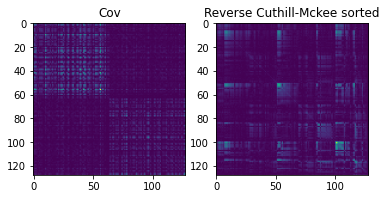

In [173]:
plt.subplot(1,2,1)
plt.imshow(torch.abs(validate_cov))
plt.title('Cov')

plt.subplot(1,2,2)

sortcor, perm = obc.blockify(torch.abs(validate_cov), hard=True)
plt.imshow(sortcor)
plt.title('Reverse Cuthill-Mckee sorted')

Text(0.5, 1.0, 'R-Cuthill-Mckee sorted')

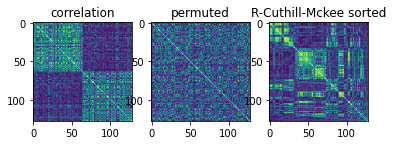

In [174]:
plt.subplot(1,3,1)
plt.imshow(torch.abs(validate_cor))
plt.title('correlation')

plt.subplot(1,3,2)
perm = np.random.choice(128, 128, replace=False)
validate_cor_permuted = validate_cor[perm][:, perm]
plt.imshow(torch.abs(validate_cor_permuted))
plt.title('permuted')


plt.subplot(1,3,3)
sortcor, perm = obc.blockify(torch.abs(validate_cor_permuted), hard=True)
plt.imshow(sortcor)
plt.title('R-Cuthill-Mckee sorted')

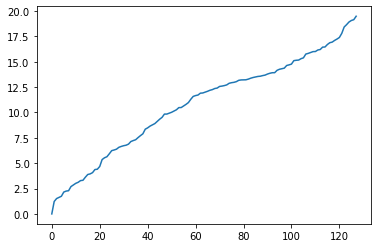

In [182]:

from sklearn.cluster import KMeans

nclass = 2
#Spectral Clustering

A = np.array(torch.abs(validate_cor_permuted)**3)

D = np.diag(A.sum(axis=1))

L = D-A


vals, vecs = np.linalg.eig(L)

#Sorted
vecs = vecs[:,np.argsort(vals)]
vals = vals[np.argsort(vals)]

plt.plot(vals)